In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [42]:
# load the dataset
column_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4','class']
feat_list = ['AF3','F3','FC5','T7','P7','O1','P8','T8','F4','F8','AF4']


data = pd.read_csv('iqr.csv')

In [43]:

imp_feat = ['F7','O2','FC6']
data = data.drop(columns=imp_feat)

In [44]:
data.head()

,AF3,F3,FC5,T7,P7,O1,P8,T8,F4,F8,AF4,class
0,4329.23,4289.23,4148.21,4350.26,4586.15,4096.92,4222.05,4238.46,4280.51,4635.90,4393.85,0
1,4324.62,4293.85,4148.72,4342.05,4586.67,4097.44,4210.77,4226.67,4279.49,4632.82,4384.10,0
2,4327.69,4295.38,4156.41,4336.92,4583.59,4096.92,4207.69,4222.05,4282.05,4628.72,4389.23,0
3,4328.72,4296.41,4155.90,4343.59,4582.56,4097.44,4217.44,4235.38,4287.69,4632.31,4396.41,0
4,4326.15,4292.31,4151.28,4347.69,4586.67,4095.90,4210.77,4244.10,4288.21,4632.82,4398.46,0


In [71]:
print("dimension of data: {}".format(data.shape))

dimension of data: (13865, 15)


In [72]:
print(data.groupby('class').size())

class
0    7549
1    6316
dtype: int64


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13865 entries, 0 to 13864
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF3     13865 non-null  float64
 1   F7      13865 non-null  float64
 2   F3      13865 non-null  float64
 3   FC5     13865 non-null  float64
 4   T7      13865 non-null  float64
 5   P7      13865 non-null  float64
 6   O1      13865 non-null  float64
 7   O2      13865 non-null  float64
 8   P8      13865 non-null  float64
 9   T8      13865 non-null  float64
 10  FC6     13865 non-null  float64
 11  F4      13865 non-null  float64
 12  F8      13865 non-null  float64
 13  AF4     13865 non-null  float64
 14  class   13865 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.6 MB


In [74]:
from scipy.stats import norm

def qqplot(x):
    x.sort()
    n=len(x)
    rank = np.arange(1,n+1,1)
    line = (rank-0.5)/n
    
    zr = []
    for i in range(0,len(x)):
        t = norm.ppf(line[i])
        zr.append(t)

    z = np.multiply(zr,np.std(x)) + np.mean(x)

    plt.scatter(zr,x)
    plt.plot(zr,z,color='r',lw=2)
    plt.show()

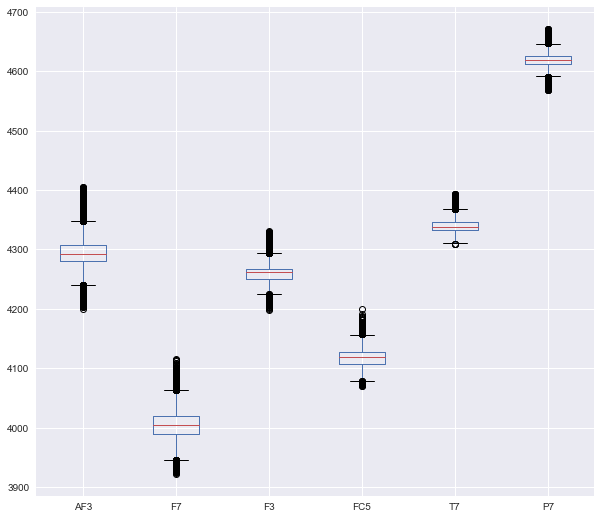

In [76]:
plt.figure(figsize=(10,9))
boxplot = data.boxplot(column=feat_list[0:6])

In [77]:
print("{:7}\t{:5}\t{:5}\t{:5}\t{:5}\t{:5}\t{:5}".format("Channel", "min", "mean", "max", "min", "mean", "max"))
x_cols =  ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"]
for x in x_cols: 
    print("{:6}\t{:5.0f}\t{:5.0f}\t{:5.0f}\t{:5.0f}\t{:5.0f}\t{:5.0f}".format(x, data[data['class']==1][x].min(), data[data['class']==1][x].mean(), data[data['class']==1][x].max(), data[data['class']==0][x].min(), data[data['class']==0][x].mean(), data[data['class']==0][x].max()))

Channel	min  	mean 	max  	min  	mean 	max  
AF3   	 4199	 4300	 4404	 4207	 4291	 4405
F7    	 3923	 4003	 4115	 3924	 4007	 4103
F3    	 4212	 4263	 4330	 4197	 4259	 4331
FC5   	 4070	 4119	 4200	 4073	 4119	 4178
T7    	 4310	 4339	 4393	 4309	 4340	 4393
P7    	 4581	 4617	 4671	 4568	 4620	 4671
O1    	 4026	 4072	 4132	 4027	 4071	 4124
O2    	 4574	 4615	 4677	 4572	 4614	 4682
P8    	 4148	 4201	 4257	 4152	 4199	 4256
T8    	 4175	 4231	 4288	 4170	 4228	 4288
FC6   	 4131	 4201	 4269	 4131	 4198	 4261
F4    	 4226	 4279	 4332	 4216	 4274	 4326
F8    	 4512	 4606	 4696	 4512	 4599	 4695
AF4   	 4251	 4362	 4463	 4262	 4351	 4465


In [20]:
correlation = data.corr()
eigen_vals, eigen_vecs = np.linalg.eigh(correlation)
print('\nEigenvalues: \n%s' % eigen_vals)


Eigenvalues: 
[0.05987719 0.13958428 0.19365599 0.23542749 0.24630982 0.36158796
 0.4565959  0.66211247 1.35597059 1.8955908  5.3932875 ]


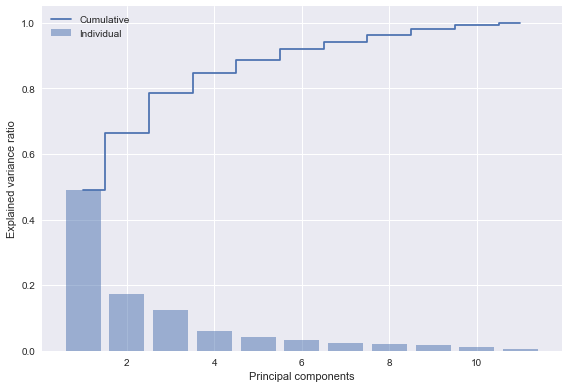

In [21]:
tot = sum(np.abs(eigen_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, align='center',label='Individual')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid',label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('pcaiqr.png')
plt.show()

In [22]:
cum_var_exp

array([0.49029886, 0.6626253 , 0.78589535, 0.8460874 , 0.88759612,
       0.92046775, 0.94285955, 0.96426205, 0.98186714, 0.99455662,
       1.        ])

In [45]:
X = data.drop('class', 1)
y = data['class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=11)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
X_train.shape

(11092, 11)

In [47]:
svc = SVC(kernel='rbf',C=50,gamma='auto',probability=True)
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.97
Accuracy on test set: 0.94


In [48]:
def roc_calc(model,X_test,y_test,name):
    pred_prob = svc.predict_proba(X_test)
    # auc scores
    auc_score1 = roc_auc_score(y_test, pred_prob[:,1])
    print('accuracy score is: ' + str(auc_score1))
    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')
    plt.savefig('roc'+str(name) + '.png')
    plt.show();

accuracy score is: 0.9806117224149925


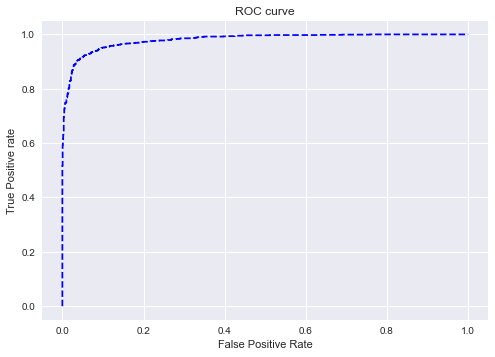

In [49]:
roc_calc(svc,X_test,y_test,'svm')

Precision  0.94
Recall 0.92


<Figure size 576x396 with 0 Axes>

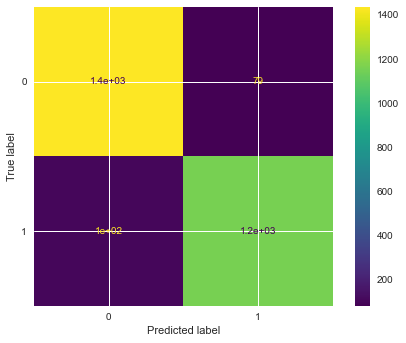

In [50]:
prediction=svc.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(svc, X_test, y_test)
plt.savefig('svm.png')
plt.show()

### Data splitting

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'class'], data['class'], stratify=data['class'], random_state=66)

In [52]:
X_train.shape, X_test.shape

((10398, 11), (3467, 11))

## LDA

In [53]:
ldam=LinearDiscriminantAnalysis()
ldam.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(ldam.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(ldam.score(X_test, y_test)))

Accuracy on training set: 0.65
Accuracy on test set: 0.64


Precision  0.63
Recall 0.48


<Figure size 576x396 with 0 Axes>

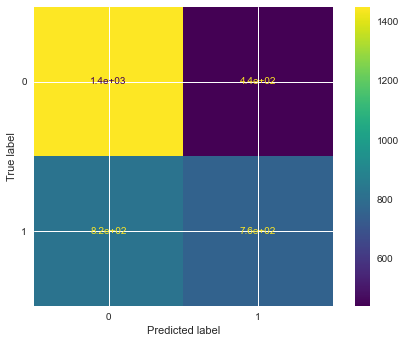

In [54]:
prediction=ldam.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(ldam, X_test, y_test)
plt.savefig('ldacm.png')
plt.show()

## QDA

In [55]:
qdam=QuadraticDiscriminantAnalysis()
qdam.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(qdam.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(qdam.score(X_test, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.77


Precision  0.80
Recall 0.67


<Figure size 576x396 with 0 Axes>

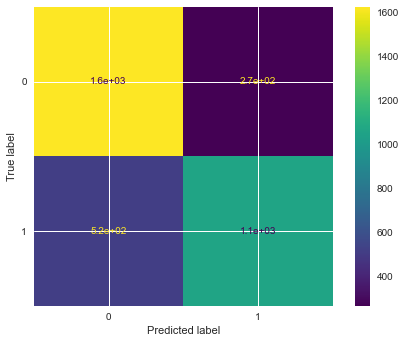

In [56]:
prediction=qdam.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(qdam, X_test, y_test)
plt.savefig('qdacm.png')
plt.show()

### Support Vector Machine

In [57]:
svc = SVC(kernel='rbf',C=1, decision_function_shape='ovo')
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.62
Accuracy on test set: 0.61


In [58]:
svc = SVC(kernel='poly',degree=3,C=1, decision_function_shape='ovo')
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.65
Accuracy on test set: 0.64


### Neural Networks

In [59]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.55
Accuracy on test set: 0.55


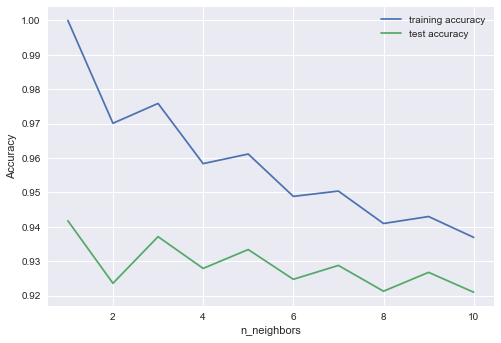

In [60]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [61]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

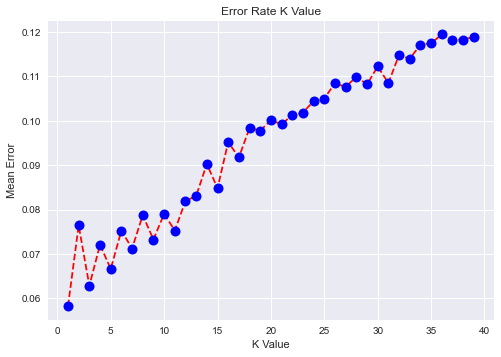

In [62]:
plt.figure()
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [63]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.94


Precision  0.94
Recall 0.93


<Figure size 576x396 with 0 Axes>

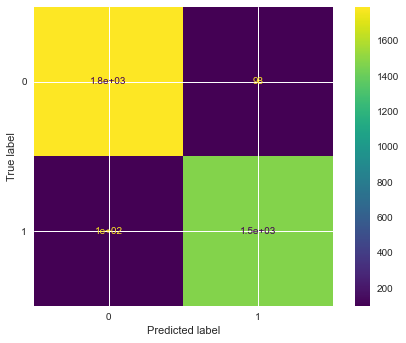

In [64]:
prediction=knn.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(knn, X_test, y_test)
plt.savefig('knncm.png')
plt.show()

In [65]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.646
Test set score: 0.637


/home/rohith/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Precision  0.63
Recall 0.48


<Figure size 576x396 with 0 Axes>

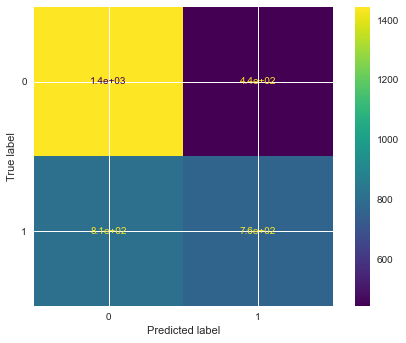

In [66]:
prediction=logreg.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

### Decision Tree

In [67]:
tree = DecisionTreeClassifier(max_depth=20,random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.807


Precision  0.79
Recall 0.78


<Figure size 576x396 with 0 Axes>

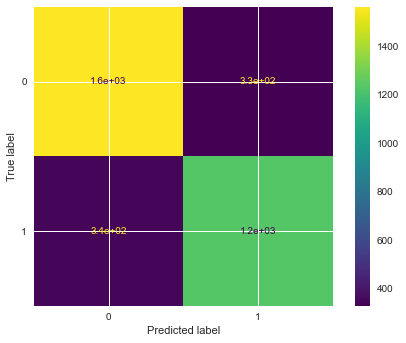

In [68]:
prediction=tree.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(tree, X_test, y_test)
plt.show()

### Random Forest

In [69]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.894


Precision  0.90
Recall 0.86


<Figure size 576x396 with 0 Axes>

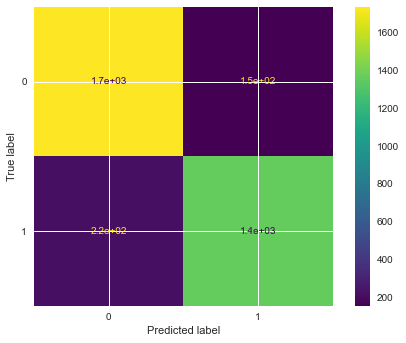

In [70]:
prediction=rf.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(rf, X_test, y_test)
plt.show()

### Gradient Boosting

In [71]:
gb = GradientBoostingClassifier(random_state=0,max_depth=10, learning_rate=0.1)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.907


Precision  0.91
Recall 0.88


<Figure size 576x396 with 0 Axes>

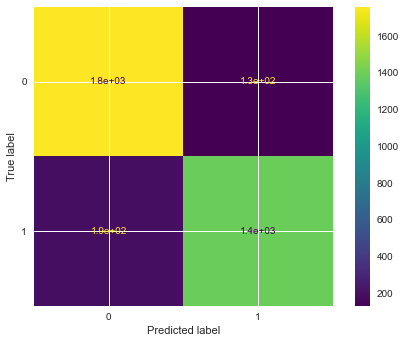

In [72]:
prediction=gb.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(gb, X_test, y_test)
plt.show()

In [73]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])

In [74]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [76]:
#X = data[feat_list].values
#y = data['class'].values

model = Sequential()
model.add(Dense(64, input_shape=(11,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

y_cat = to_categorical( y_train.values)
history = model.fit(X_train, y_cat, verbose=0, epochs=20)

In [77]:
model.predict_classes(X_test)
acc = history.history['accuracy'][-1]

In [78]:
print("Accuracy on test set: {:.3f}".format(acc))

Accuracy on test set: 0.544


In [79]:
prediction=model.predict_classes(X_test)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
#plot_confusion_matrix(model, X_test_scaled, y_test)
plt.show()

Precision  0.00
Recall 0.00


/home/rohith/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 576x396 with 0 Axes>